# Structure

- 1. Introduction
- 2. Background and History
- 3. Terminiology
- 4. Example: The Iris Dataset
- 5. Alternatives and Evolution
- 6. Conclusion

# 1. Introduction

This notebook will explore the boxplot, also known as box-and-whisker-plot. While widely used in statistics and analytics, it is not as intuitive to read to the untrained eye as many other common graphs, like a scatterplot or histogram. I will give some background on the boxplot, its creator, demonstrate how the boxplot can be generated in Python and also explain the relevant terminology needed to understand what boxplots are all about.



<img src="http://4.bp.blogspot.com/-DJSvG22i-e8/U-IbKEFte9I/AAAAAAAABfI/Ng9lSqk2iX0/s1600/boxplotcat.jpg" width='350'>

<img src="https://www.python-graph-gallery.com/wp-content/uploads/32_Custom_Boxplot_Appearance_Seaborn3.png" width='350'>



# 2. Background and History



> "the boxplot comes from the fertile brain of John Tukey (1977), who has done as much for exploring the beauty of data as Marilyn Monroe has done for the calendar" (1)

<img src="https://upload.wikimedia.org/wikipedia/en/e/e9/John_Tukey.jpg" width=250>

The boxplot was introduced in 1977 by John W. Tukey in his book "Exploratory Data Analysis" (EDA). Tukey believed that more emphasis needs to be placed on exploring the data first to come up with a suitable hypothesis, rather than going in immediately with statistical hypothesis testing as this can lead to bias. (2) A train of thought that he shared with his colleague Francis Anscombe, who demonstrated on the Anscombe quartet that descriptive statistics by themselves can be misleading.

Tukey has already been a household name in statistics being a founding chairman of the Princeton statistics department and being credited to have coined the term "bit" as a shorter version of "binary digit" while working with John von Neumann on early computer designs (2).

The boxplot distinguishes itself from many other data visualizations by displaying the "five number summary" of the data at hand as well as displaying outliers clearly.


(1) Biostatistics: The Bare Essentials,  Geoffrey R. Norman, David L. Streiner, 2008, p. 26

(2) https://en.wikipedia.org/wiki/John_Tukey

(3) https://en.wikipedia.org/wiki/Five-number_summary



# 3.  Terminology

Above I have introduced the 5 number summary. The five numbers heavily rely on **percentiles**. The nth percentile usually indicates that n percent of samples fall below this percentile. If you score in the 80th percentile in an exam, then 80% of results are below your mark meaning that you scored better than 80% of the other students. (1) There are different approaches to whether or not the nth percentile is the lowest score that is greater than n percent, or whether it is the score that is greater or equal. A good overview on this discussion can be found on wikipedia.


<img src="https://www.statisticshowto.datasciencecentral.com/wp-content/uploads/2013/09/percentile.png" width=250>


the 5 most important sample percentiles (3): 

  * **the sample minimum (smallest observation)**: This is the 0th percentile.

  * **the lower quartile or first quartile**: This is the 25th percentile.

  * **the median (the middle value)**: This is the 50th percentile.

  * **the upper quartile or third quartile**: This is the 75th percentile.

  * **the sample maximum (largest observation)**: This is the  100th percentile.


The **interquartile range (IQR)** is another key concept of the boxplot. It refers to the difference between the third and first quartile, the 75th percentile and the 25th percentile meaning the middle 50% of data. (1)

Additionally, boxplots show outliers and can go as far as to differenciate between a **suspected outlier** and **outliers**. Outliers are "an observation that lie an abnormal distance from other values in a random sample from a population." (2) Definitions on what this abnormal distance is, can vary. For the boxplot, it is the following: 


> **Outliers** are either 3×IQR or more above the third quartile or 3×IQR or more below the first quartile. (3)

> **Suspected outliers** are are slightly more central versions of outliers: either 1.5×IQR or more above the third quartile or 1.5×IQR or more below the first quartile. (3)

<img src="http://www.physics.csbsju.edu/stats/complex.box.defs.gif" width=250>

#### References

(1) https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/percentiles-rank-range/

(2) https://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm

(3) http://www.physics.csbsju.edu/stats/box2.html

# 4. Example: The Iris Data Set

In this section I will demonstrate boxplots and explain the above terminology. There are several ways to generate boxplots in Python. Packages such as pandas, seaborn and matplotlib offer inbuilt commands to call a boxplot and various ways to customize the plot.

To illustrate the boxplot and its characterists, let's have a look at boxplots of the famous Iris Data Set. The Iris Data Set contains of measurements of 3 different species of the Iris flower.


   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


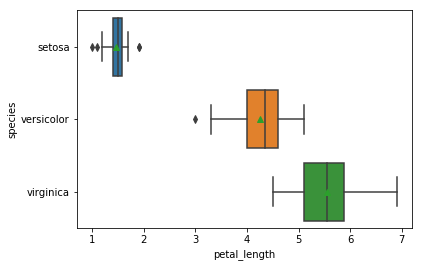

sepal_length    5.843333
sepal_width     3.054000
petal_length    3.758667
petal_width     1.198667
dtype: float64
sepal_length    5.80
sepal_width     3.00
petal_length    4.35
petal_width     1.30
dtype: float64


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
import seaborn as sb 
from sklearn.datasets import load_iris

#load dataset
iris = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv')
print(iris.head()) #show first 5 rows

setosa = iris[iris['species']== 'setosa']
versicolor = iris[iris['species']== 'versicolor']
virginica = iris[iris['species']== 'virginica']


#generate boxplot of columns
sb.boxplot(data = iris, x='petal_length', y='species', orient = 'h', showmeans=True)
plt.show()
#mean vs median
print(iris.mean())
print(iris.median())

The above boxplot depicts the 5 number summary of the variable "petal_length" across the three different species. We can clearly see that setosa and versicolor have outliers and that the petal length in setosa has significantly less range than versicolor and virginica. Also it is evident that virginica tends to have the longest petals, while setosas petals are significantly shorter than the other two.


You might have noticed the green triangle in each box which has not been accounted for so far. The green traingle is the mean and usually not a part of the boxplot. We have defined above that the line through the box is the median. It is easy to confuse the two, especially as they can be the same or very close, however it is important to distinguish: 

- The **mean** is the average: Add all values and divide by the number of elements
- The **median** is middle value: Rank all values and divide the number of elements by 2 - the element at the n-th rank is the median.

As can be seen above for versicolor, the mean is distintively different from the median, it is lower. This could be due to the outlier on the lower end of the box, which pulls the mean down.


# 5. Alternatives and Evolution


As can be seen above, the boxplot is a powerful tool to quickly showcase the five number summary of data. It relies on actual datapoints rather than calculated values, such as the mean. However, this poses a limitation to the cases in which the boxplot can be used: the data has to be rankable. (1) 

However, it also has its limitations. The boxes do not show how many datapoints they contain and in comparison to a histogram, information about the distribution isn't as detailed. As Hadley Wickham and Lisa Stryjewski point out in their paper "40 years of boxplots" these constraints may stem from the origins of the boxplots. In the 70s, before computers were as advanced and common in every household, the boxplot was designed to be drawn by hand,  easily put together once the 5 number summary was calculated. (1)

Since then, the boxplot has seen  various evolutions and the above mentioned paper gives a great overview of these evolutions, including colored variants and attempts to give boxplots a second dimension. 


(1)http://vita.had.co.nz/papers/boxplots.pdf


C:\Users\sarah\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


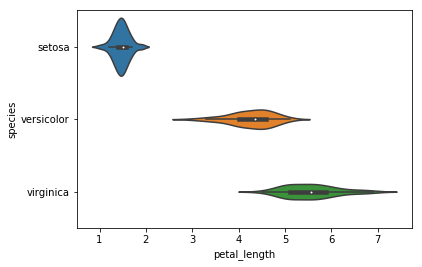

In [3]:
#violinplot shows how the values are distributed

sb.violinplot(data = iris, x='petal_length', y='species', orient = 'h', showmeans=True)
plt.show()

The violinplot nicely outlines the distribution. In comparison to the boxplot of the same stats above, it is much more evident that setosa has a higher density of values in the inner quartile, while this information could not be deduced from the boxplot unless one knew all species had the same amount of samples.